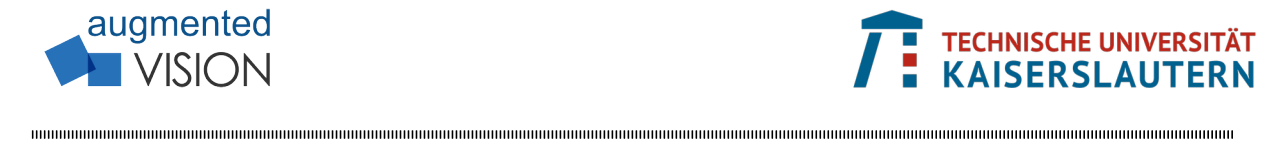

# 2D Image Processing - Exercise Sheet 1: Filters

The notebook guides you through the exercise. Read all instructions carefully.

* **Deadline**: 16.05.2022 @ 23:59
* **Contact**: Michael.Fuerst@dfki.de
* Submission: As HTML Printout (see Exercise 0); filename is `ex01_2DIP_group_XY.html`, where XY is replaced by your group number.
* Allowed Libraries: Numpy, OpenCV and Matplotlib (unless a task specifically states differently).
* Copying or sharing code is NOT permitted and results in failing the exercise. However, you could compare produced outputs if you want to. (Btw, this includes copying code from the internet.)

---

## 0. Infrastructure: Cloud Image Loader

This is an image loader function, that loads the images needed for the exercise from the dfki-cloud into an opencv usable format. This allows for easy usage of colab, since you only need this notebook and no other files.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import requests
from PIL import Image

def get_image(name, no_alpha=True):
    url = f'https://cloud.dfki.de/owncloud/index.php/s/THLirfoB6SYTetn/download?path=&files={name}'
    image = np.asarray(Image.open(requests.get(url, stream=True).raw))
    if no_alpha and len(image) > 2 and image.shape[2] == 4:
        image = image[:,:,:3]
    return image[:,:,::-1].copy()

## 1. Image Correlation & Template Matching

### Theory: Correlation

What is meant by image Correlation? Explain it with the geometric interpretation. How to handle the pixel values at the boundaries?

*Hint: Double click on the solution cell and you can enter your answer. Your answer must be within a single cell and keep the caption (i.e. `**Solution:**`) so we can find it. The cell supports Markdown ([Cheatsheet](https://www.markdownguide.org/cheat-sheet)) and LaTeX for formulas. To add a latex formula use `$`, for example: `$f(x) = \sum_i x_i$` -> $f(x) = \sum_i x_i$*.

**Solution:**

TODO (double click here to edit)

### Programming Task: Template Matching

Template Matching is a method for searching and finding the location of a template image in a larger image.
It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image.
Several comparison methods are implemented in OpenCV.
You could use the predefined template functions or write the user defined functions.

Write a simple program to find a the given below template image from the given input image.
The template matching function returns a grayscale image as an output, where each pixel denotes how much does the neighborhood of that pixel match with template image.
If input image is of size (W x H) and template image is of size (w x h), output image will have a size of (W-w+1 , H-h+1). 

Template:

![template](https://cloud.dfki.de/owncloud/index.php/s/THLirfoB6SYTetn/download?path=&files=messi_template.png)

Image:

![messi](https://cloud.dfki.de/owncloud/index.php/s/THLirfoB6SYTetn/download?path=&files=messi.png)

*Hint: You can check the opencv documentation or implement the algorithm using numpy from scratch.*

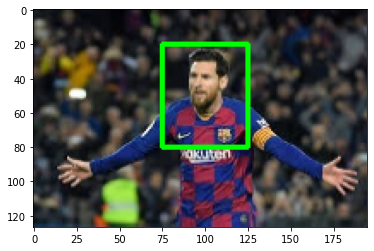

In [2]:
# Solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

messi = get_image("messi.png")
template = get_image("messi_template.png")

top_left = (75,20)
bottom_right = (125, 80)

# TODO add your code including comments
# TODO find the template and visualize it on the image. The visualization should look somewhat like the example, just the correct patch...

messi_template = cv2.rectangle(messi, top_left, bottom_right, (0,255,0), 2)
plt.imshow(messi_template[:,:,::-1])  # Do not forget the BGR to RGB for plotting...
plt.show()

---

## 2. Image Smoothing and Image Filtering

### Theory: Filtering

What is meant by Image Filtering? Please explain the difference between local filter and area/global filter, linear filter and non-linear filter, high-pass filter and low-pass filter with examples.

**Explanation:**

TODO (double click here to edit)

### Programming Task: Gaussian vs Average Smoothing

Apply Gaussian and Average smoothing filters over given input image and play with the degree of smoothing parameter sigma as 3, 5 and 7 to observe it effect on the output.

Write a small description on the behaviour of the smoothing parameter. Explain using the images you generate.

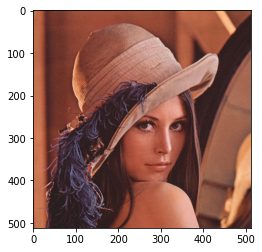

In [3]:
# Solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

lena = get_image("lena.png")

# TODO add your code including comments

# Feel free to add more visualizations.
plt.imshow(lena[:,:,::-1])  # Do not forget the BGR to RGB for plotting...
plt.show()

**Explanation:**

TODO (double click here to edit)

---

## 3. Image Noise and Image Sharpening

### Theory: Noise Types

What is meant by noise in an image? Eplain three noises:
1. Salt and pepper noise
2. Impulse noise
3. Gaussian noise

**Solution:**

TODO (double click here to edit)

### Programming Task: Noise + Filter

Apply the three noises (above) on the images and then apply:
1. Guassian Filter
2. Average Filter
3. Median Filter

Then explain: What can you observe in above images? What works well and what not and why?

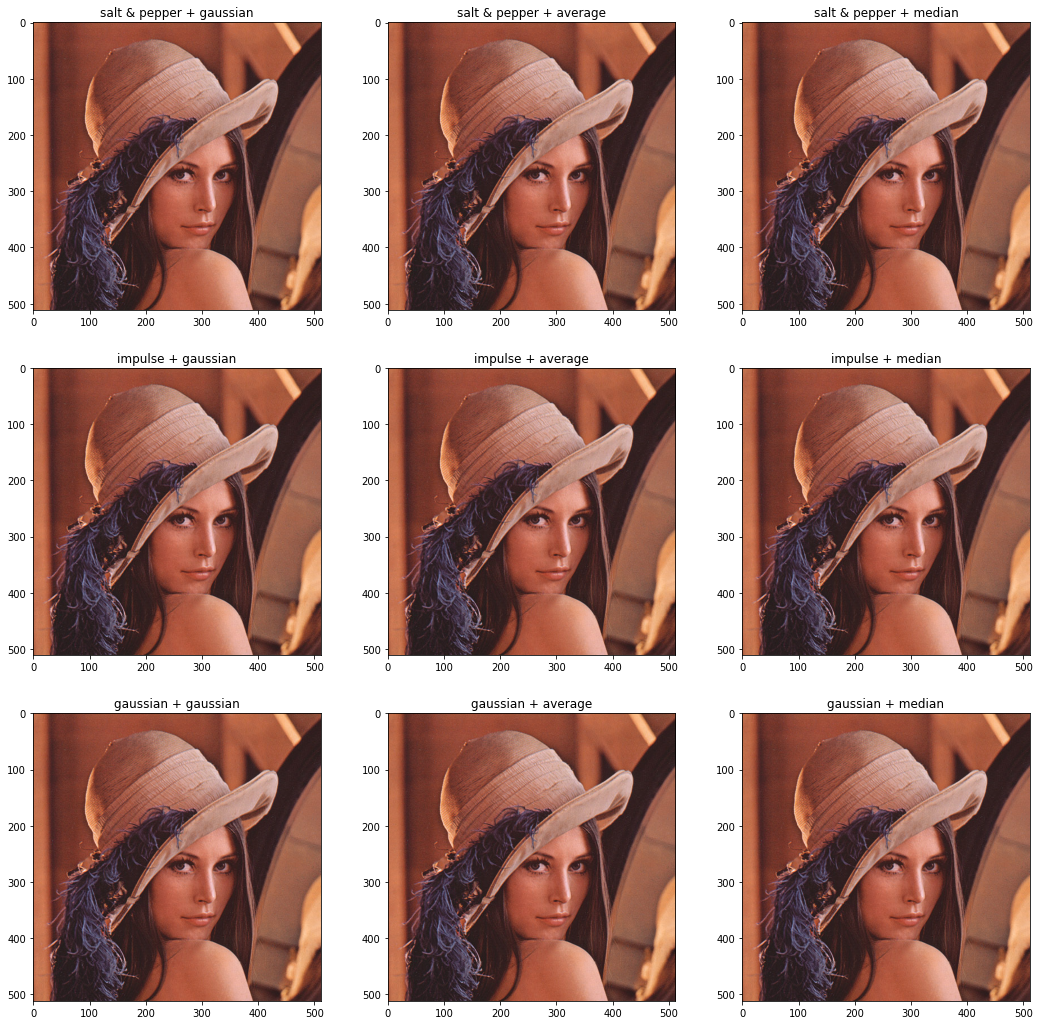

In [4]:
# Solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_grid3x3(results):
    # Visualize the results in a 3x3 image matrix
    ROWS=3; COLS=3
    plt.figure(figsize=(18,18)) # Make a wide figure
    for idx, (title, image) in enumerate(results.items()):
        plt.subplot(ROWS, COLS, idx + 1)  # Select subplot
        plt.title(title)  # Set title to key of dict
        plt.imshow(image[:,:,::-1])  # BGR2RGB
    plt.show()


# TODO add your code including comments
lena = get_image("lena.png")
results = {
    "salt & pepper + gaussian": lena,
    "salt & pepper + average": lena,
    "salt & pepper + median": lena,
    "impulse + gaussian": lena,
    "impulse + average": lena,
    "impulse + median": lena,
    "gaussian + gaussian": lena,
    "gaussian + average": lena,
    "gaussian + median": lena,
}
visualize_grid3x3(results)

**Explanation:**

TODO (double click here to edit)

### Programming Task: Sharpening

Now write a small program that applies sharpening on above lena images.

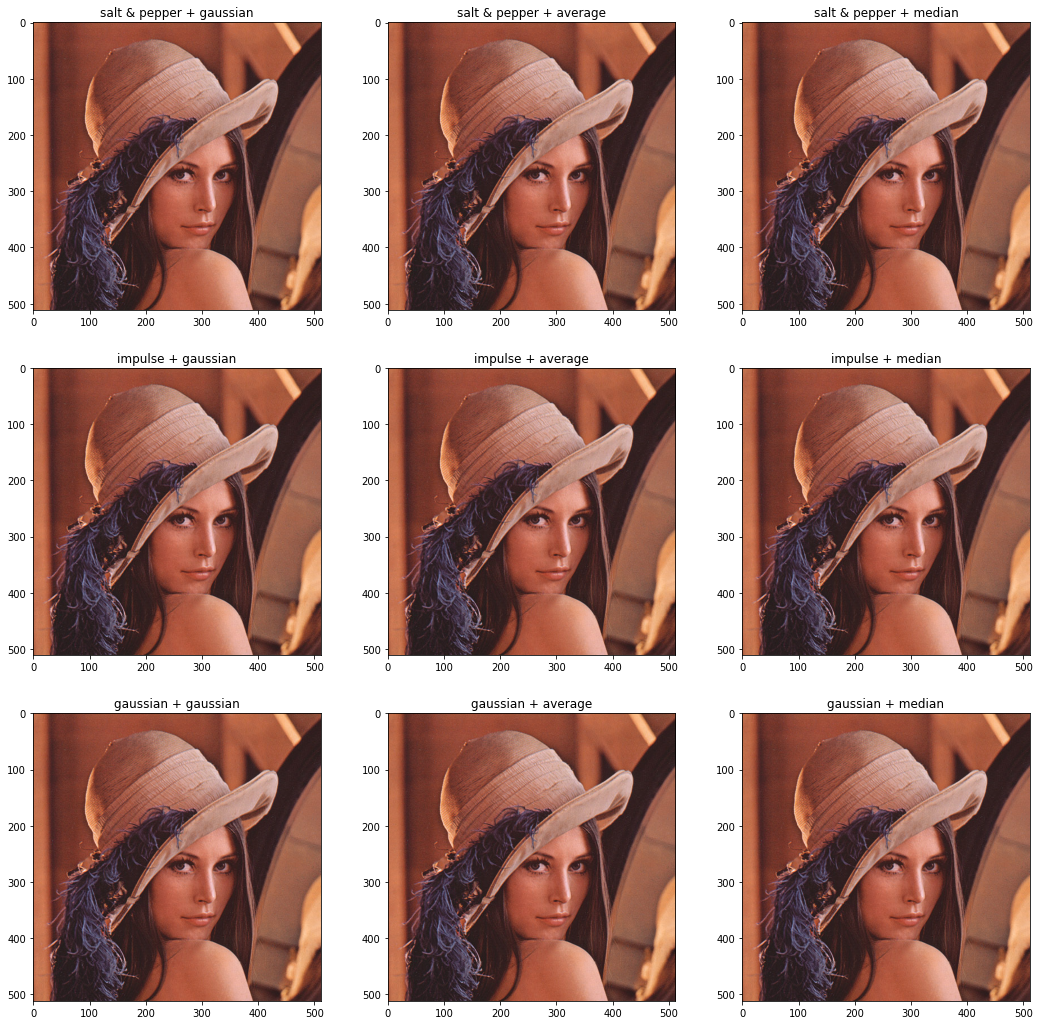

In [5]:
# Solution:

# TODO sharpen the smothed images from above.
visualize_grid3x3(results)

---

## 4. Fourier Transform and its applications

### Theory: Fourier

1. Explain how Fourier Transformation and Inverse Fourier Transformation work on a digital image. Explain why it is useful to transform an image from spatial domain into frequency domain.
2. After transforming an image into frequency domain, explain what kind of image information is saved in high frequency and low frequency.
3. Explain why Laplacian is a high pass filter, explain that using Fourier Transformation.

**Solution:**

TODO (double click here to edit)

### Programming Task: Fourier Transformation

In image processing, often only the magnitude of the Fourier Transform is displayed, as it contains most of the information of the geometric structure of the spatial domain image. See the example below:

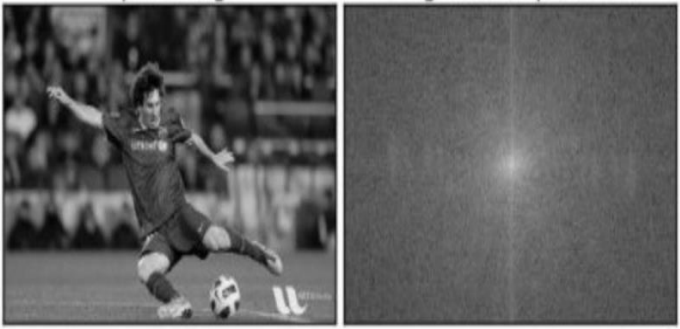

Implement Fourier Transformation on a grayscale image (use any), the result should be similar to the given example.

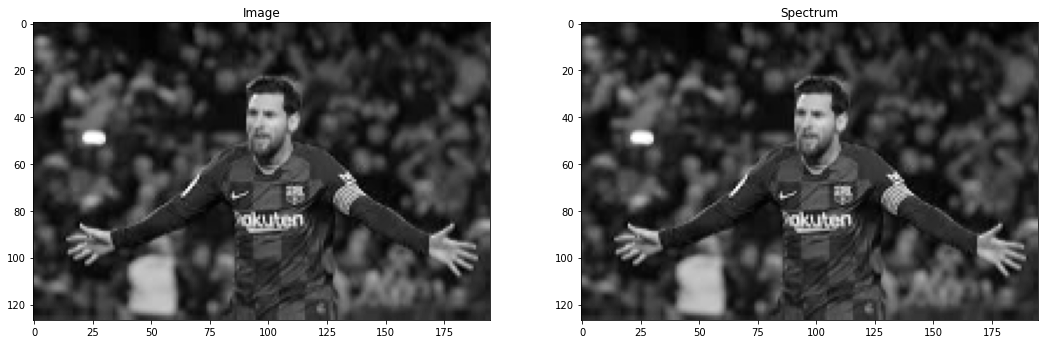

In [6]:
# Solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualize image and spectrum side by side
def visualize_spectrum(image, spectrum):
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Spectrum")
    plt.imshow(spectrum, cmap="gray")
    plt.show()


messi = get_image("messi.png")
messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY)
# TODO add your code including comments
visualize_spectrum(messi_gray, messi_gray)

### Programming Task: High Pass Filter

Remove the low frequency part by masking (60x60), and transform the image back into spatial domain, please explain what happened.

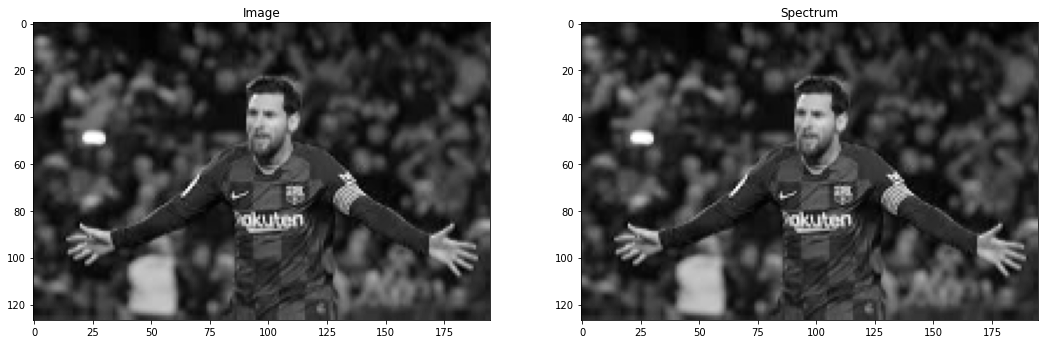

In [7]:
# Solution

# TODO add your code including comments
visualize_spectrum(messi_gray, messi_gray)

**Explanation:**

TODO (double click here to edit)

### Programming Task: Low Pass Filter

Remove the high frequency part, and transform the image back into spatial domain, please explain what happened.

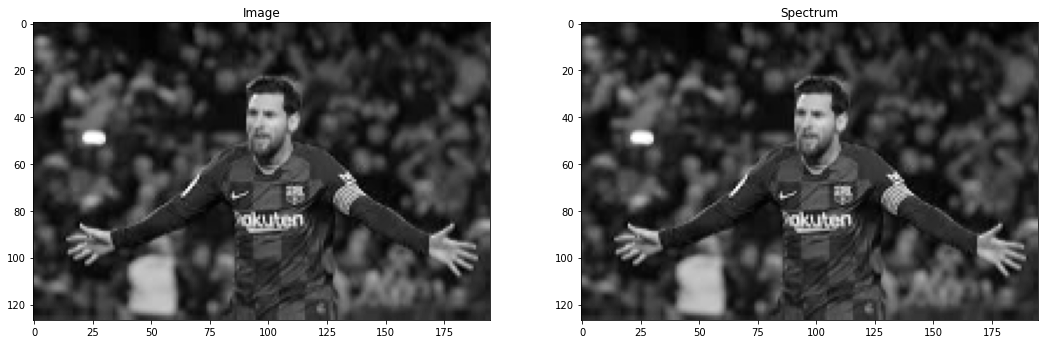

In [8]:
# Solution

# TODO add your code including comments
visualize_spectrum(messi_gray, messi_gray)

**Explanation:**

TODO (double click here to edit)

---

## 5. Integral Histogram of an Image

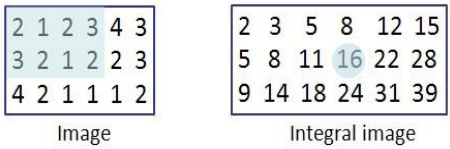

As shown in the figure, the left side is a grayscale image $I$, and its integral image is shown on
the right. In the integral image, each pixel represents the cumulative sum of a corresponding
input pixel with all pixels above and to the left of the input pixel. In another word, the (i, j)th
element of integral image is equal to the sum of all the pixel values in the upper left corner of
the (i, j)th pixel in the original image $I$.

$$
\begin{aligned}
I_{integral}(2, 4) &= I(1,1) + I(1,2) + I(1,3) + I (1,4) + I(2,1 ) + I(2,2) + I(2,3) + I(2,4)\\
&= 2 + 1 + 2 + 3 + 3 + 2 + 1 + 2\\
&= 16
\end{aligned}
$$

Similarly, the definition of the integral histogram $H$ of an image $I$ is as follows:
The integral histogram of an image is equal to the image on size (width and height are equal),
and its $(i, j)$th element indicates the histogram obtained by counting the pixel value of all pixels
in the upper left corner of the $(i, j)$th pixel of the original image $I$, as shown in the following
figure:

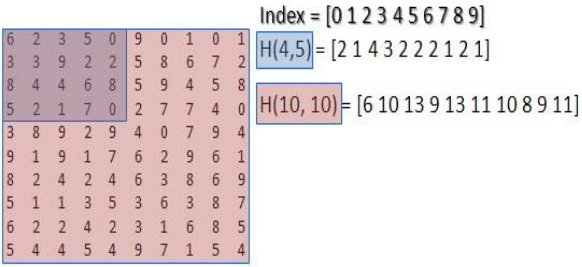

In this example, the range of pixel value of the grayscale image is 0-9. The element $H(4,5)$ of
its integral histogram is a histogram of the upper left corner of the $(4,5)$th pixel in the original
image. The number of pixels with value 0-9 is 2, 1, 4, 3, 2, 2, 2, 1, 2, 1, correspondingly. So in
this case, it has 10 bins, so the integral histogram $H$ should be in size of Height x Width x 10,
and $H(4,5) = [2, 1, 4, 3, 2, 2, 2, 1, 2, 1]$.

### Programming Task

Implement the integral histogram $H$ for a grayscale image and visualize the histogram $H(10,10)$ using matplotlib, please explain the  outputs.

**Note: *This time you are only allowed to use OpenCV to load the image and matplot lib to visualize, implement the function yourself*.**

*Hint: https://www.mathworks.com/help/images/ref/integralimage.html*

(127, 195) uint8 2 253


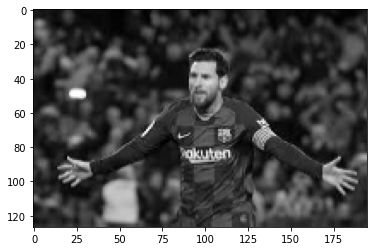

In [9]:
# Solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

messi = get_image("messi.png")
messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY)

# TODO add your code including comments
print(messi_gray.shape, messi_gray.dtype, messi_gray.min(), messi_gray.max())

plt.imshow(messi_gray, cmap="gray")
plt.show()

**Explanation:**

TODO (double click here to edit)